In [ ]:
# ANALISI PRELIMINARE REGRESSORI (AREA AGRICOLA)

<AxesSubplot:>

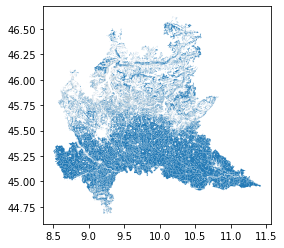

In [33]:
df = gpd.read_file('..\\resources\\REGIONE_LOMBARDIA\\Area_agricola_nello_stato_di_fatto_articolo43.shp')

df.to_crs(epsg=4326, inplace=True)
df.plot()

In [34]:
df

,WIZ_U32WG_,ARTICOLO,ISTAT,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,101881.519006,1862.551898,"POLYGON ((8.81300 45.59631, 8.81337 45.59629, ..."
1,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,167998.890282,2528.378404,"POLYGON ((8.86461 45.59897, 8.86543 45.59757, ..."
2,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,2034.709113,195.049164,"POLYGON ((8.87126 45.59848, 8.87090 45.59838, ..."
3,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,866.924122,198.920701,"POLYGON ((8.87163 45.59851, 8.87160 45.59850, ..."
4,0.0,Aree agricole nello stato di fatto art. 43,12026,BUSTO ARSIZIO,5017.668598,423.272446,"POLYGON ((8.80845 45.59900, 8.80847 45.59833, ..."
...,...,...,...,...,...,...,...
61633,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,4022.035409,396.439808,"POLYGON ((9.36742 46.11273, 9.36752 46.11255, ..."
61634,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,19835.572116,1004.305746,"POLYGON ((9.31865 46.11253, 9.31898 46.11247, ..."
61635,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,1205.258657,145.396328,"POLYGON ((9.31746 46.11307, 9.31740 46.11274, ..."
61636,0.0,Aree agricole nello stato di fatto art. 43,97032,DORIO,2575.256482,317.882663,"POLYGON ((9.36905 46.11227, 9.36880 46.11199, ..."


In [35]:
df.shape

(61638, 7)

In [76]:
# TODO

In [ ]:
# ANALISI PRELIMINARE REGRESSORI (TEMPERATURA 1)

In [63]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_temperature = xr.load_dataset('..\\datasets\\temperature.nc') # Copernicus (0.75°x0.75°)

ds_temperature

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 204)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 247.31548 ... 246.61078
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-22 12:18:30 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [51]:
lat_bounds = slice(46.65,44.75) # Invertiti
lon_bounds = slice(8.5, 11.25)

t2m = ds_temperature.t2m.sel(latitude=lat_bounds, longitude=lon_bounds)

In [52]:
t2m

<xarray.DataArray 't2m' (time: 204, latitude: 3, longitude: 4)>
array([[[267.25284, 266.30984, 264.9379 , 266.4324 ],
        [273.8572 , 274.26572, 273.11337, 273.9304 ],
        [276.9381 , 275.85382, 275.4572 , 276.0002 ]],

       [[265.20343, 264.58215, 263.39233, 265.59494],
        [272.62994, 273.5372 , 271.91675, 272.10568],
        [275.79086, 274.887  , 274.65042, 275.2836 ]],

       [[274.58914, 273.01123, 271.52866, 273.63422],
        [280.28796, 280.58923, 278.94666, 279.78583],
        [283.248  , 282.70502, 282.32373, 282.3833 ]],

       ...,

       [[280.34412, 279.699  , 278.73218, 279.88794],
        [285.5408 , 285.96463, 284.2795 , 285.5391 ],
        [289.22598, 288.67108, 288.19446, 289.1579 ]],

       [[272.85803, 272.38654, 271.35162, 273.12698],
        [278.7424 , 279.65305, 277.9509 , 279.68027],
        [282.67438, 282.56033, 282.49905, 283.69226]],

       [[270.97205, 270.0614 , 268.7899 , 269.69882],
        [276.7577 , 277.2632 , 275.30234, 276.50916],
        [279.84708, 279.09473, 278.52792, 279.11685]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 9.0 9.75 10.5 11.25
  * latitude   (latitude) float32 46.5 45.75 45.0
  * time       (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

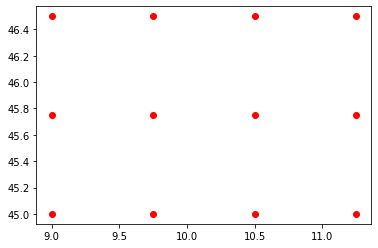

In [53]:
lats = t2m.latitude
lons = t2m.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')

In [ ]:
# ANALISI PRELIMINARE REGRESSORI (TEMPERATURA 2)

In [67]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

ds_temperature_2 = xr.load_dataset('..\\datasets\\dtr_mon_0.1deg_reg_ens_median_E-OBSv20.0e.nc') # E-OBS (0.1°x0.1°)

ds_temperature_2

<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 705, time: 840, x: 2)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
  * time       (time) datetime64[ns] 1950-01-16 ... 2019-12-16
Dimensions without coordinates: x
Data variables:
    time_bnds  (time, x) float64 0.0 30.0 31.0 ... 2.554e+04 2.554e+04 2.557e+04
    dtrETCCDI  (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    CDI:                          Climate Data Interface version 1.6.3 (http:...
    history:                      Tue Jan 07 09:23:03 2020: cdo -O enspctl,50...
    Conventions:                  CF-1.4
    NCO:                          netCDF Operators version 4.7.5 (Homepage = ...
    nco_openmp_thread_number:     1
    title:                        climate impact indices computed using E-OBS
    data_version:                 20.0e
    Indices_references:           http://surfobs.climate.copernicus.eu/usergu...
    data_references:              Cornes et al. 2018, doi:10.1029/2017JD028200
    index_calculation_frequency:  mon
    institute:                    KNMI
    contact:                      eca@knmi.nl
    file_created:                 2019-11-19T08:39:40Z
    climind_version:              1.0.0
    CDO:                          Climate Data Operators version 1.6.3 (http:...

In [72]:
lat_bounds = slice(44.75,46.65) # Invertiti
lon_bounds = slice(8.5, 11.25)

dtrETCCDI = ds_temperature_2.dtrETCCDI.sel(latitude=lat_bounds, longitude=lon_bounds)

In [73]:
dtrETCCDI

<xarray.DataArray 'dtrETCCDI' (time: 840, latitude: 19, longitude: 28)>
array([[[ 5.5732255,  5.3641934,  5.160645 , ...,  4.817419 ,
          4.785484 ,  4.8870964],
        [ 5.61129  ,  5.4135485,  5.118387 , ...,  5.039355 ,
          4.9764514,  4.982258 ],
        [ 5.808387 ,  5.5335484,  5.167742 , ...,  5.0899997,
          5.1835485,  5.2432256],
        ...,
        [ 6.627742 ,  6.9858065,  7.1867743, ...,  8.781612 ,
          8.6596775,  7.963226 ],
        [ 6.433871 ,  6.6587095,  6.6348386, ...,  8.827742 ,
          8.529677 ,  8.238387 ],
        [ 6.6680646,  6.1480646,  6.6958065, ...,  8.823871 ,
          8.029032 ,  8.292581 ]],

       [[ 7.2949996,  7.2546425,  7.0860715, ...,  6.7846427,
          6.7110715,  6.8764286],
        [ 7.463928 ,  7.380714 ,  7.1467857, ...,  6.7325   ,
          6.843571 ,  6.8989286],
        [ 7.6521425,  7.4567857,  7.285357 , ...,  6.865357 ,
          6.8675   ,  7.0014286],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float64 44.85 44.95 45.05 45.15 ... 46.45 46.55 46.65
  * time       (time) datetime64[ns] 1950-01-16 ... 2019-12-16
Attributes:
    long_name:     Mean Diurnal Temperature Range
    units:         degrees_C
    cell_methods:  ensemble: mean
    history:       Created by climind 1.0.0 on Tue Nov 19 08:39:40 2019

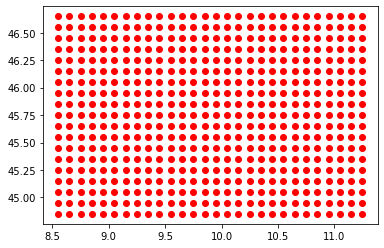

In [74]:
lats = dtrETCCDI.latitude
lons = dtrETCCDI.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')

In [ ]:
# ANALISI PRELIMINARE REGRESSORI (ALTITUDINE)

In [54]:
ds_elevation = xr.load_dataset('..\\datasets\\elev_ens_0.1deg_reg_v21.0e.nc') # E-OBS (0.1°x0.1°)

ds_elevation

<xarray.Dataset>
Dimensions:    (latitude: 465, longitude: 705)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 45.25 45.35 45.45
  * latitude   (latitude) float64 25.05 25.15 25.25 25.35 ... 71.25 71.35 71.45
Data variables:
    elevation  (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    References:     http://surfobs.climate.copernicus.eu//dataaccess/access_e...
    E-OBS_version:  21.0e
    Conventions:    CF-1.4

In [58]:
lat_bounds = slice(44.75,46.65)
lon_bounds = slice(8.5, 11.25)

elevation = ds_elevation.elevation.sel(latitude=lat_bounds, longitude=lon_bounds)

In [59]:
elevation

<xarray.DataArray 'elevation' (latitude: 19, longitude: 28)>
array([[  98.19444  ,   94.72222  ,  116.43056  ,  153.88889  ,
         247.15277  ,  355.14584  ,  499.1111   ,  658.3958   ,
         668.9861   ,  470.38196  ,  392.2639   ,  339.90277  ,
         272.34723  ,  202.26389  ,  150.93056  ,   93.798615 ,
          56.354168 ,   36.65972  ,   28.180555 ,   22.625    ,
          16.222221 ,   12.284722 ,   13.111111 ,   11.277778 ,
          11.069445 ,    8.034722 ,    6.       ,    5.9652777],
       [ 108.423615 ,  111.40972  ,   71.9375   ,   82.263885 ,
         104.25694  ,  206.75694  ,  284.46527  ,  357.93054  ,
         352.38196  ,  245.79861  ,  170.63194  ,  117.263885 ,
          89.99306  ,   66.5625   ,   47.854168 ,   31.972221 ,
          26.083334 ,   23.868055 ,   21.743055 ,   16.555555 ,
          12.875    ,   11.       ,   11.       ,   11.       ,
          11.       ,    6.4791665,    5.826389 ,    6.9305553],
       [ 110.47222  ,   83.923615 ,   73.520836 ,   68.770836 ,
          65.458336 ,   68.84722  ,   93.86806  ,  138.10417  ,
         123.451385 ,   74.72222  ,   57.868057 ,   49.13889  ,
          42.11111  ,   34.125    ,   30.82639  ,   26.95139  ,
          24.472221 ,   21.5      ,   20.76389  ,   17.95139  ,
          14.166667 ,   12.895833 ,   11.541667 ,   11.       ,
...
        2012.0209   , 2282.2708   , 2499.5068   , 2280.0278   ,
        2278.6528   , 2406.2986   , 2484.0278   , 2484.514    ,
        2536.5693   , 2259.1943   , 1800.5625   , 2281.9514   ,
        2775.4167   , 2815.7014   , 2526.2014   , 2083.4514   ,
        1823.6041   , 1231.625    , 1249.3889   ,  623.19446  ],
       [2096.014    , 2000.7986   , 2181.764    , 2122.6318   ,
        1787.257    , 2523.2083   , 2229.139    , 2205.9583   ,
        2108.7014   , 2041.5764   , 2176.6182   , 2154.514    ,
        2564.639    , 2224.7568   , 2339.875    , 2535.764    ,
        2240.7568   , 2342.8193   , 2349.75     , 2481.3333   ,
        2188.2153   , 2594.389    , 2159.5486   , 2169.0557   ,
        1937.882    , 1544.6597   , 1007.5278   ,  809.49304  ],
       [1895.7986   , 2265.7153   , 2067.2847   , 1966.5764   ,
        2237.4722   , 2159.889    , 1747.4375   , 2086.0625   ,
        1995.2014   , 1533.8472   , 1511.1459   , 1801.7361   ,
        2030.3959   , 2576.139    , 2402.4722   , 2185.3818   ,
        2168.0068   , 2334.7917   , 2277.0693   , 1925.6736   ,
        1358.4445   , 1724.0903   , 1773.0347   , 1805.9445   ,
        1394.5764   , 1277.9097   ,  547.2778   , 1614.3125   ]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float64 44.85 44.95 45.05 45.15 ... 46.45 46.55 46.65
Attributes:
    units:      metres
    long_name:  Elevation

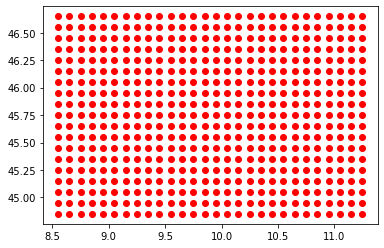

In [60]:
lats = elevation.latitude
lons = elevation.longitude

coords = [(lat, lon) for lat in lats.to_series() for lon in lons.to_series().tolist()]

lats = [coord[0] for coord in coords]
lons = [coord[1] for coord in coords]

plt.scatter(lons, lats, c='r')